In [157]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [158]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Gabriel\Documents


In [159]:
#Ler dados PNAD 2014
dados_2014 = pd.read_csv('PES2014.csv', sep=",")

In [160]:
#Acessar dados PNAD 2014
tamanho = dados_2014.shape[0]
data = pd.DataFrame()

In [161]:
#Definição de sexo
data["Sexo"] = dados_2014.V0302.astype("category")
data.Sexo.cat.categories = ("Masculino", "Feminino")

In [162]:
#Variavel Cor ou Raça/ Qualitativa
data["Cor_ou_raca"] = dados_2014.V0404.astype("category")
data.Cor_ou_raca.cat.categories = ("Indigena", "Branco","Preta","Amarela","Pardo","Sem Declaração")

In [163]:
#Variavel Estudos/ Qualitativa
data["Nivel_de_Ensino"] = dados_2014.V6007.astype("category")
data.Nivel_de_Ensino.cat.categories = ("Elemental(primario)",
"Médio 1º ciclo (ginasial, etc.)",
"Médio 2º ciclo (científico, clássico, etc.)",
"Regular do ensino fundamental ou do 1º grau",
"Regular do ensino médio ou do 2º grau",
"Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau",
"Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau",
"Superior de graduação",
"Mestrado ou doutorado",
"Alfabetização de jovens e adultos",
"Creche",
"Classe de alfabetização - CA ",
"Maternal, jardim de infância etc.")

In [164]:
#Variavel Regiao/ Qualitativa


data["Regiao"] = dados_2014.UF

data.Regiao[(dados_2014.UF > 10) & (dados_2014.UF < 20)] = "Norte"
data.Regiao[(dados_2014.UF > 20) & (dados_2014.UF < 30)] = "Nordeste"
data.Regiao[(dados_2014.UF > 30) & (dados_2014.UF < 40)] = "Sudeste" 
data.Regiao[(dados_2014.UF > 40) & (dados_2014.UF < 50)] = "Sul" 
data.Regiao[(dados_2014.UF >= 50) & (dados_2014.UF < 60)] = "Centro Oeste" 


C:\Users\Gabriel\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [165]:
#Variavel Anos_de_Estudo/ Qualitativa
data["Anos_de_estudo"] = dados_2014.V4803.astype("category")
data.Anos_de_estudo.cat.categories = ("0", "1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16")

In [219]:
#Variavel Renda/ Quantitativa
data["Renda"] = dados_2014.V4743
data.Renda = data.Renda[(data.Renda<99)]
data.Renda = data.Renda.dropna()

In [220]:
# Célula reestringe os dados apenas para os Aposentados

Aposentados_Gov_2014 = data[dados_2014.V9122==2]

#Separando os aposentados homens e aposentados mulheres
Aposentados_Homens_2014 = Aposentados_Gov_2014[(Aposentados_Gov_2014.Sexo == "Masculino")]
Aposentados_Mulheres_2014 = Aposentados_Gov_2014[(Aposentados_Gov_2014.Sexo == "Feminino")]

#Separando para os aposentados que tinham ensino superior
Ap_Homens_Superior_2014 = Aposentados_Homens_2014[(Aposentados_Homens_2014.Nivel_de_Ensino == "Superior de graduação")]

#Ap_Homens_Superior_Branco_e_Pardo_2014 =  Ap_Homens_Superior_2014[(Ap_Homens_Superior_2014.Cor_ou_raca == "Branco") | (Ap_Homens_Superior_2014.Cor_ou_raca== "Parda")]

Ap_Homens_Superior_15anos_2014 = Ap_Homens_Superior_2014[(Ap_Homens_Superior_2014.Anos_de_estudo == "15")]

Ap_Homens_Superior_Branco_e_Pardo_15anos_2014 = Ap_Homens_Superior_15anos_2014[(Ap_Homens_Superior_15anos_2014.Cor_ou_raca == "Branco") | (Ap_Homens_Superior_15anos_2014.Cor_ou_raca == "Pardo")]

Ap_Homens_Superior_Branco_e_Pardo_15anos_Sudeste_2014 = Ap_Homens_Superior_Branco_e_Pardo_15anos_2014[(Ap_Homens_Superior_Branco_e_Pardo_15anos_2014.Regiao == "Sudeste")]


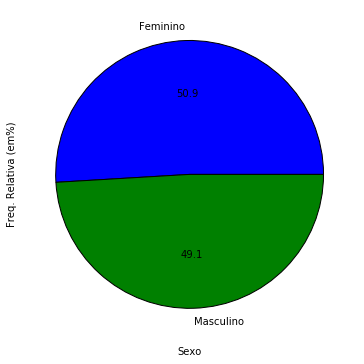

In [241]:
data1 = ((Aposentados_Gov_2014.Sexo.value_counts()/tamanho)*100).round(decimals=1)
plot_graph1 = data1.plot(kind="pie", autopct="%.1f", figsize=(6,6))
plt.ylabel("Freq. Relativa (em%)")
plt.xlabel("Sexo")

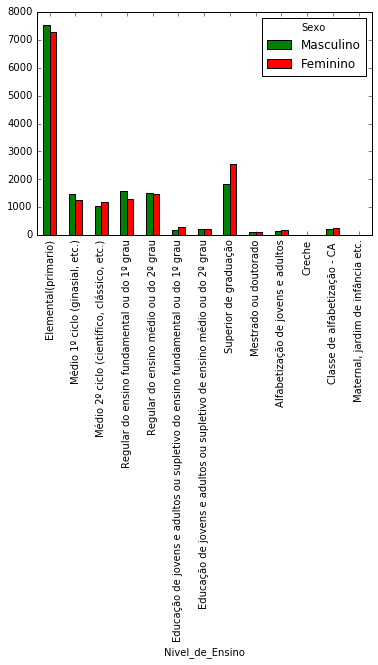

In [237]:
cross2 = pd.crosstab(Aposentados_Gov_2014.Nivel_de_Ensino, Aposentados_Gov_2014.Sexo)
cross2.plot(kind='bar',color = ("green", "red"))
plt.ylabel("Números Absolutos (1000 pessoas)")
plt.xlabel("Nível de Ensino")

# A percentagem de estudo dos Brancos com Ensino Superior é de 75%, acompanhado dos Pardos, da mesma forma que os percentuais também se aplicam a quantidade de anos estudados.

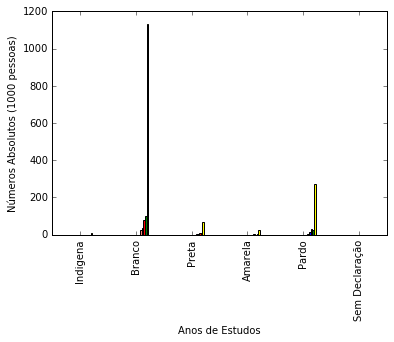

In [242]:
cross3 = pd.crosstab(Ap_Homens_Superior_2014.Cor_ou_raca, Ap_Homens_Superior_2014.Anos_de_estudo)
cross3.plot(kind='bar',color = ('yellow', 'salmon', 'blue', 'red', 'green'),  legend=False)
plt.ylabel("Números Absolutos (1000 pessoas)")
plt.xlabel("Anos de Estudos")

# Assim, a análise será feita para a comparação dos Brancos e dos Pardos em seus níveis de Renda.

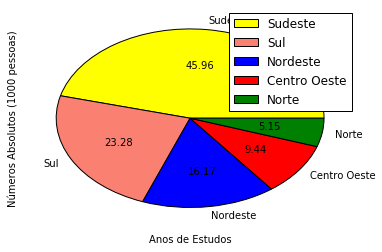

In [234]:
GraphRegiao = Ap_Homens_Superior_2014.Regiao.value_counts()
GraphRegiao.plot(kind='pie', colors=('yellow', 'salmon', 'blue', 'red', 'green'), autopct="%.2f", legend=True)
plt.ylabel("Números Absolutos (1000 pessoas)")
plt.xlabel("Anos de Estudos")

# A maior concentração de estudos se dá na região Sudeste, e esta será analisada em maior detalhe.


# A seguir, será analisada a frequência dos anos de estudo dentro das diferentes etnias.
# Assim, iremos determinar qual é a maior frequência de anos de estudos para os aposentados na faixa.

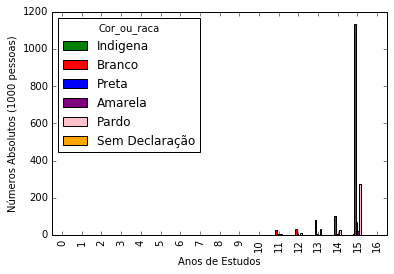

In [232]:
GraphRegiao = pd.crosstab(Ap_Homens_Superior_2014.Anos_de_estudo, Ap_Homens_Superior_2014.Cor_ou_raca)
GraphRegiao.plot(kind='bar',color = ("green", "red", "blue", "purple", "pink", "orange"),  legend=True)
plt.ylabel("Números Absolutos (1000 pessoas)")
plt.xlabel("Anos de Estudos")

# A maior frequência se situa nos 15 anos de estudo.
# Nós já possuímos um espaço considerável para análise.
# Homens aposentados com ensino Superior, com quinze anos de estudo, que moram na Região Sudeste.
# Com essas informações vamos comparar a renda obtida pelos indivíduos de raça Branca e Parda nestas condições descritas.

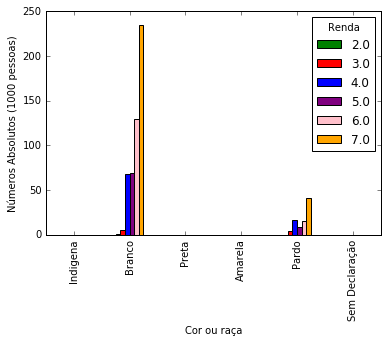

In [228]:
GraphRegiao = pd.crosstab(Ap_Homens_Superior_Branco_e_Pardo_15anos_Sudeste_2014.Cor_ou_raca, Ap_Homens_Superior_Branco_e_Pardo_15anos_Sudeste_2014.Renda)
GraphRegiao.plot(kind='bar',color = ("green", "red", "blue", "purple", "pink", "orange", "yellow"),  legend=True)
plt.ylabel("Números Absolutos (1000 pessoas)")
plt.xlabel("Cor ou raça")

# Neste gráfico, é possível perceber a diferença entre os salários dos aposentados brancos e pardos que moram no sudeste e possuem ensino superior e 15 anos de estudo.